In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path = '/content/walmart.csv'

df = pd.read_csv(path)


In [3]:
#Data Cleaning Process
print(df.head(10))

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0               

In [4]:
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
#inspecting unique values in key categorical cols
print(df.nunique())
print(df['Product_ID'].value_counts())

print(df['Gender'].value_counts())

print(df['Age'].value_counts())

print(df['Occupation'].value_counts())

print(df['City_Category'].value_counts())

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00062442       1
P00074842       1
P00132742       1
P00301442       1
P00298342       1
Name: count, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177


In [7]:
#Categorical data into Numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})
df['Gender'] = le.fit_transform(df['Gender'])
print(df['Gender'].head(10))

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Gender, dtype: int64


In [8]:
#Converted age group value from categorical to ordinal numerical values
age_map = {
    '0-17': 1,
    '18-25':2,
    '26-35':3,
    '36-45':4,
    '46-50':5,
    '51-55':6,
    '55+':7
}

df['Age'] = df['Age'].map(age_map)
print(df['Age'].head(10))

0    1
1    1
2    1
3    1
4    7
5    3
6    5
7    5
8    5
9    3
Name: Age, dtype: int64


In [9]:
#City
city_map ={
    'A':1,
    'B':2,
    'C':3
}

df['City_Category'] = df['City_Category'].map(city_map)
print(df['City_Category'].head(10))

0    1
1    1
2    1
3    1
4    3
5    1
6    2
7    2
8    2
9    1
Name: City_Category, dtype: int64


In [10]:
#Stay_inCC into Numerical value

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+',4).astype(int)
print(df['Stay_In_Current_City_Years'].head(10))


0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    2
8    2
9    1
Name: Stay_In_Current_City_Years, dtype: int64


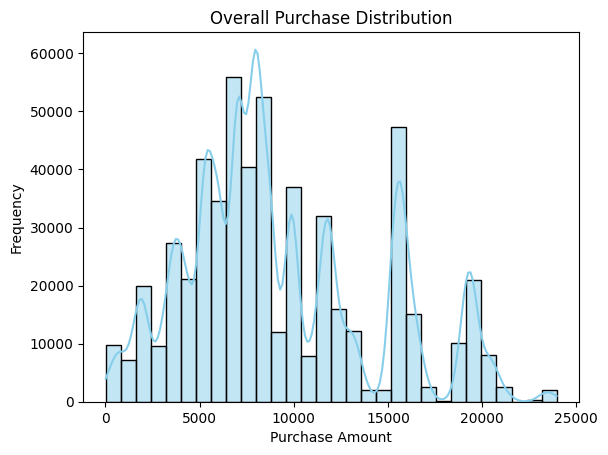

In [11]:
#Now we want to remove extreme high purchase value that might deviate the results

#1. visualizing the purchase distribution
sns.histplot(df['Purchase'], kde=True, bins=30, color='skyblue')
plt.title('Overall Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [12]:
#removing outliers based on thresholds
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

low_bnd = Q1 - 1.5 * IQR
high_bnd = Q3 + 1.5 * IQR

df = df[(df['Purchase'] >= low_bnd) & (df['Purchase'] <= high_bnd)]



In [13]:
#Normalized the purchase column to a range of [0,1], a value of 5k will be transfroemd to 0, 20k to 1 and 12.5k to 0.5
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Purchase']] = scaler.fit_transform(df[['Purchase']])
print(df[['Purchase']].head(10))

   Purchase
0  0.390798
1  0.710151
2  0.065928
3  0.048861
4  0.372048
5  0.711413
6  0.897882
7  0.740730
8  0.732875
9  0.367466


In [14]:
print(df.info(10))
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     547391 non-null  int64  
 1   Product_ID                  547391 non-null  object 
 2   Gender                      547391 non-null  int64  
 3   Age                         547391 non-null  int64  
 4   Occupation                  547391 non-null  int64  
 5   City_Category               547391 non-null  int64  
 6   Stay_In_Current_City_Years  547391 non-null  int64  
 7   Marital_Status              547391 non-null  int64  
 8   Product_Category            547391 non-null  int64  
 9   Purchase                    547391 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 45.9+ MB
None
   User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001  P00069042       1    1          10              1   


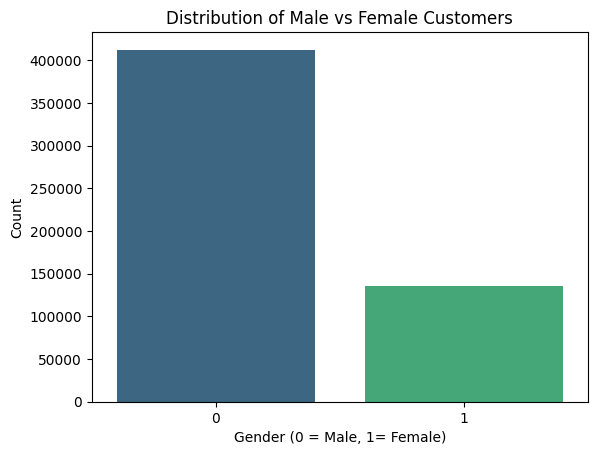

In [15]:
#EDA and Feature Engg Process
#Univariate Analysis
#a. Distribution of Male vs Female customers

sns.countplot(x='Gender', data=df, palette ='viridis')
plt.title("Distribution of Male vs Female Customers")
plt.xlabel('Gender (0 = Male, 1= Female)')
plt.ylabel('Count')
plt.show()

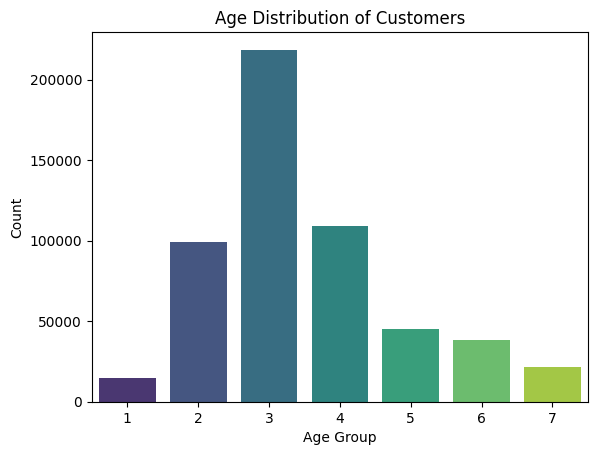

In [16]:
#b. Distribution of Age
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Age Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
#Shows that number of customers are highest from age group 26-35

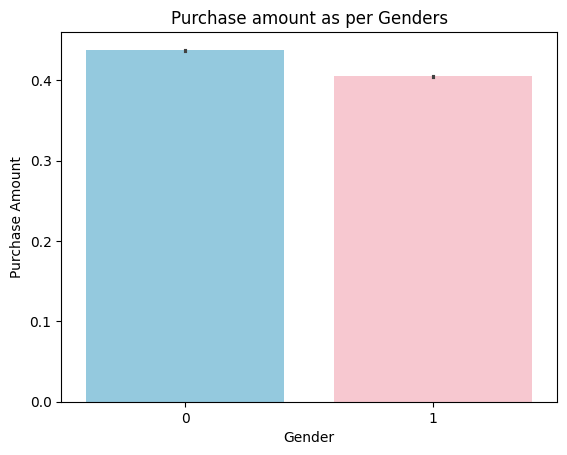

In [17]:
#Bivariate Analysis
#1. Comparing the purchase amounts between male and female

sns.barplot(x='Gender', y='Purchase', data = df, palette=['skyblue','pink'])
plt.title('Purchase amount as per Genders')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

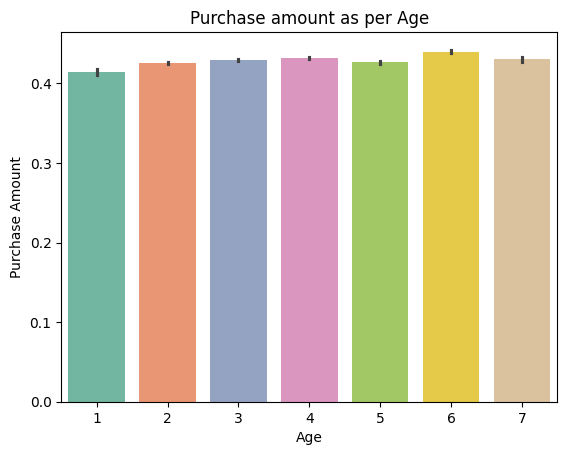

In [18]:
#Age vs Purchase
sns.barplot(x='Age', y='Purchase', data = df, palette='Set2')
plt.title('Purchase amount as per Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

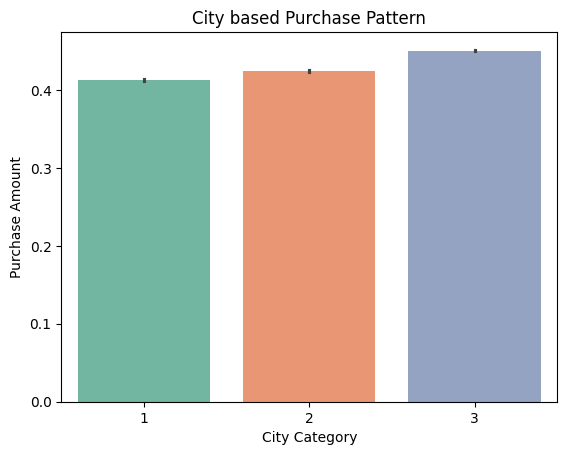

In [19]:
#purchase behavior based on city
sns.barplot(x='City_Category', y='Purchase', data = df, palette='Set2')
plt.title('City based Purchase Pattern')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

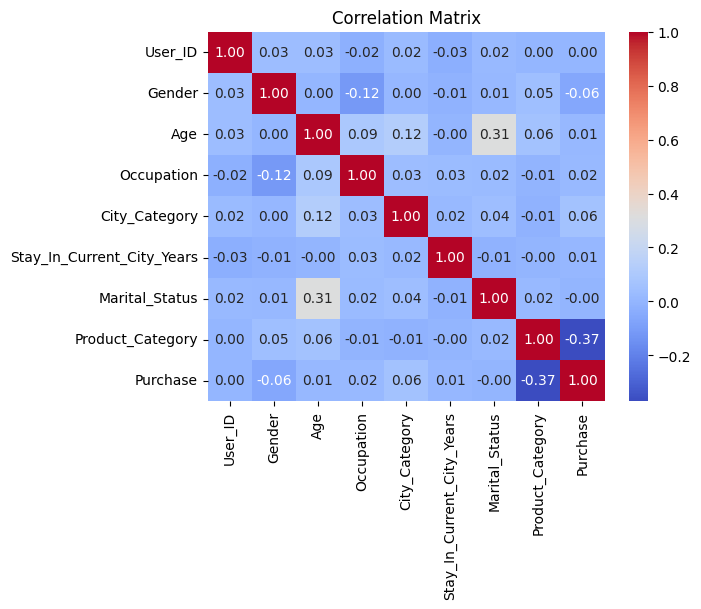

In [20]:
#Correlation Analysis to identify strong and weak variables for the model accuracy
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Feature Engineering --**
**1.Analyzing customers spending patterns**

In [27]:
#Now since we found weak correlation for most given features, there is need for new features
#Feature Engineering

#1. Analyzing customers spending patterns

cust_total_purchase = df.groupby('User_ID')['Purchase'].sum().reset_index()
cust_total_purchase.rename(columns={'Purchase' : 'Total_Purchase'}, inplace=True)
df = df.merge(cust_total_purchase, on='User_ID', how='left' , suffixes=('', '_new'))

print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase_x', 'Total_Purchase_y', 'Total_Purchase',
       'Total_Purchase_new', 'Total_Purchase_new'],
      dtype='object')


In [28]:
# Drop unnecessary duplicate columns
df = df.drop(columns=['Total_Purchase_x', 'Total_Purchase_y', 'Total_Purchase_new'], errors='ignore')

# Check the remaining columns
print(df.columns)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase'],
      dtype='object')


In [47]:
#Verifying if the new column was successfully added
print(df[['User_ID', 'Purchase', 'Total_Purchase']].head())

#For Unique values
uniq_values = df.groupby('User_ID')['Purchase'].nunique()
print(uniq_values.count())
print(uniq_values.head(10))

#For a random user check

user_id = df['User_ID'].iloc[0]
user_data = df[df['User_ID'] == user_id]

print(f"Calculated total purchase: {user_data['Total_Purchase'].iloc[0]}")

print(f"Manual Check : {user_data['Purchase'].sum()}")

   User_ID  Purchase  Total_Purchase
0  1000001  0.390798       15.601674
1  1000001  0.710151       15.601674
2  1000001  0.065928       15.601674
3  1000001  0.048861       15.601674
4  1000002  0.372048       37.852340
5891
User_ID
1000001     35
1000002     76
1000003     29
1000004     14
1000005    103
1000006     46
1000007     17
1000008     77
1000009     58
1000010    215
Name: Purchase, dtype: int64
Calculated total purchase: 15.60167391405994
Manual Check : 15.601673914059942


2. **Calculating average purchases for each customer to analyze their spending behaviour**

In [43]:
# Calculating average purchases for each customer to analyze their spending behaviour

cust_avg_purchase = df.groupby('User_ID')['Purchase'].mean().reset_index()
cust_avg_purchase.rename(columns={'Purchase' : "Average_Purchase"}, inplace=True)
df = df.merge(cust_avg_purchase, on='User_ID', how='left')

print(df.columns)
df = df.drop(columns=['Average_Purchase_x', 'Average_Purchase_y'], errors='ignore')

# Check the remaining columns
print(df.columns)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase_x',
       'Average_Purchase_y', 'Average_Purchase'],
      dtype='object')
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase'],
      dtype='object')


In [45]:
print(cust_avg_purchase.head(10))

#Now will verify for one User ID the average purchase

user_id = df['User_ID'].iloc[0]
user_data = df[df['User_ID'] == user_id]

avg_purchase_from_df = user_data['Average_Purchase'].iloc[0]
print(f"Calculated average purchase: {avg_purchase_from_df}")

man_avg_purchase = user_data['Purchase'].mean()
print(f'Manual Check : {man_avg_purchase}')

   User_ID  Average_Purchase
0  1000001          0.445762
1  1000002          0.491589
2  1000003          0.550265
3  1000004          0.689003
4  1000005          0.361588
5  1000006          0.377408
6  1000007          0.644878
7  1000008          0.483161
8  1000009          0.478379
9  1000010          0.454329
Calculated average purchase: 0.445762111830284
Manual Check : 0.4457621118302841


In [48]:
'''
Just to verify if the above data is correct
# Filter data for the specific User_ID
user_id = 1000001  # Replace with the User_ID to check
user_data = df[df['User_ID'] == user_id]

# Manually calculate total purchase
manual_total_purchase = user_data['Purchase'].sum()

# Calculate the number of purchases
num_purchases = len(user_data)

# Calculate the average purchase manually
manual_avg_purchase = manual_total_purchase / num_purchases

# Print the details
print(f"Total Purchase: {manual_total_purchase}")
print(f"Number of Purchases: {num_purchases}")
print(f"Manual Average Purchase: {manual_avg_purchase}") '''


'\n# Filter data for the specific User_ID\nuser_id = 1000001  # Replace with the User_ID to check\nuser_data = df[df[\'User_ID\'] == user_id]\n\n# Manually calculate total purchase\nmanual_total_purchase = user_data[\'Purchase\'].sum()\n\n# Calculate the number of purchases\nnum_purchases = len(user_data)\n\n# Calculate the average purchase manually\nmanual_avg_purchase = manual_total_purchase / num_purchases\n\n# Print the details\nprint(f"Total Purchase: {manual_total_purchase}")\nprint(f"Number of Purchases: {num_purchases}")\nprint(f"Manual Average Purchase: {manual_avg_purchase}") '

**3. Calculating the purchase frequency**

In [49]:
cust_freq = df.groupby('User_ID').size().reset_index(name='Frequency_of_Purchases')
df = df.merge(cust_freq, on='User_ID', how='left')

In [51]:
print(df.columns)

print(cust_freq.head(10))

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases'],
      dtype='object')
   User_ID  Frequency_of_Purchases
0  1000001                      35
1  1000002                      77
2  1000003                      29
3  1000004                      14
4  1000005                     106
5  1000006                      47
6  1000007                      17
7  1000008                      77
8  1000009                      58
9  1000010                     223


**4. Product Popularity**

In [57]:
prod_pp = df.groupby('Product_ID').size().reset_index(name='Product_Popularity')
df = df.merge(prod_pp, on='Product_ID', how='left')

In [59]:
print(df.columns)
print(prod_pp.head(10))

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase_x', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases', 'Product_Popularity'],
      dtype='object')
  Product_ID  Product_Popularity
0  P00000142                1152
1  P00000242                 376
2  P00000342                 244
3  P00000442                  92
4  P00000542                 149
5  P00000642                 512
6  P00000742                 241
7  P00000842                  36
8  P00000942                  55
9  P00001042                 503


**5. Avg Spending per Product**

In [61]:
prod_avg_spent = df.groupby('Product_ID')['Purchase_x'].mean().reset_index()
prod_avg_spent.rename(columns={'Purchase_x' : 'Avg_Spent_Per_Product'}, inplace=True)

df = df.merge(prod_avg_spent, on='Product_ID', how='left')

In [62]:
print(df.columns)
print(prod_avg_spent.head(10))

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase_x', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases', 'Product_Popularity',
       'Avg_Spent_Per_Product'],
      dtype='object')
  Product_ID  Avg_Spent_Per_Product
0  P00000142               0.520486
1  P00000242               0.492816
2  P00000342               0.247881
3  P00000442               0.223657
4  P00000542               0.252748
5  P00000642               0.696743
6  P00000742               0.281451
7  P00000842               0.467420
8  P00000942               0.493473
9  P00001042               0.642923


In [64]:
'''# Rename Purchase_x to Purchase
df.rename(columns={'Purchase_x': 'Purchase'}, inplace=True)
print(df.columns)'''

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases', 'Product_Popularity',
       'Avg_Spent_Per_Product'],
      dtype='object')


**Analyzing High/Low Spenders**

In [65]:
#Categorizing customers based on their total purchase amount for customer segmentation
#Dividing the column Total_Purchase in 4 quantiles (25% :Low, 25-50%: Med, 50-75% : High, 75-100%: Very High)
df['Spender_Cat'] = pd.qcut(df['Total_Purchase'], 4, labels=['Low', 'Medium', 'High','Very High'])
print(df['Spender_Cat'].value_counts())

Spender_Cat
High         137027
Medium       136892
Low          136884
Very High    136588
Name: count, dtype: int64


In [66]:
print(df[['User_ID','Total_Purchase', 'Spender_Cat']].head(10))

   User_ID  Total_Purchase Spender_Cat
0  1000001       15.601674         Low
1  1000001       15.601674         Low
2  1000001       15.601674         Low
3  1000001       15.601674         Low
4  1000002       37.852340      Medium
5  1000003       15.957685         Low
6  1000004        9.646047         Low
7  1000004        9.646047         Low
8  1000004        9.646047         Low
9  1000005       38.328377      Medium


In [79]:
print(df['Purchase'].describe())

count    547391.000000
mean          0.429402
std           0.230929
min           0.000000
25%           0.266938
50%           0.375275
75%           0.561416
max           1.000000
Name: Purchase, dtype: float64


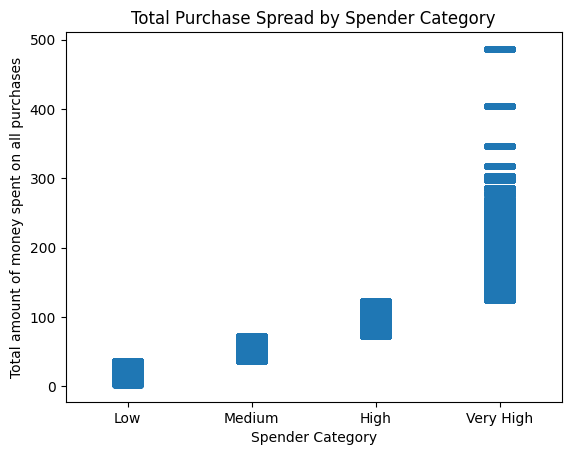

In [78]:
sns.stripplot(x='Spender_Cat', y='Total_Purchase', data=df, order=['Low', 'Medium', 'High', 'Very High'], jitter=True)
plt.title('Total Purchase Spread by Spender Category')
plt.ylabel('Total amount of money spent on all purchases')
plt.xlabel('Spender Category')
plt.show()

#Here the y-label 0 - 500 comes from sum of scaled values from Purchase ( it has added up multiple scaled values for each customer.)


**Calculating Top Revenue Generating Products**

In [93]:
total_revenue = df['Purchase'].sum()
product_revenue = df.groupby('Product_ID')['Purchase'].sum().reset_index()
product_revenue['Revenue_Contribution'] = (product_revenue['Purchase'] / total_revenue) * 100
df = df.merge(product_revenue[['Product_ID', 'Revenue_Contribution']], on='Product_ID', how='left')


In [91]:
#df = df.drop(columns=['Revenue_Contri_x', 'Revenue_Contri_y'])

In [95]:
print(df.columns)
print(product_revenue.head(10))

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases', 'Product_Popularity', 'Avg_Spent_Per_Product',
       'Spender_Cat', 'Revenue_Contribution'],
      dtype='object')
  Product_ID    Purchase  Revenue_Contribution
0  P00000142  599.600318              0.255094
1  P00000242  185.298733              0.078833
2  P00000342   60.482863              0.025732
3  P00000442   20.576472              0.008754
4  P00000542   37.659513              0.016022
5  P00000642  356.732314              0.151768
6  P00000742   67.829663              0.028857
7  P00000842   16.827138              0.007159
8  P00000942   27.141020              0.011547
9  P00001042  323.390097              0.137583


**Building Prediction Model**

In [96]:
#dropping user and product ids as they are not relevant

df_model = df.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [98]:
print(df_model.columns)

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Total_Purchase', 'Average_Purchase',
       'Frequency_of_Purchases', 'Product_Popularity', 'Avg_Spent_Per_Product',
       'Spender_Cat', 'Revenue_Contribution'],
      dtype='object')


In [100]:
#Converting spenders category into numeric variables

le = LabelEncoder()
df_model['Spender_Cat'] = le.fit_transform(df_model['Spender_Cat'])


In [101]:
# Split the data into Training and Test Sets
#Features(x) and Target Variable(Y)

from sklearn.model_selection import train_test_split
X = df_model.drop('Purchase', axis=1)
y = df_model['Purchase']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8, random_state=42)


(547391, 14)
(547391,)


In [102]:
#Confirming the split

print("X_train_split", X_train.shape)
print('X_test_split',X_test.shape)
print('y_train_split', y_train.shape)
print('y_test_split', y_test.shape)

X_train_split (437912, 14)
X_test_split (109479, 14)
y_train_split (437912,)
y_test_split (109479,)


Linear Regression: [0.52886309 0.64798289 0.36783185 ... 0.32461078 0.24093765 0.22355509]
     Actual  Predicted
0  0.446486   0.528863
1  0.710665   0.647983
2  0.282929   0.367832
3  0.324262   0.303433
4  0.463553   0.407671
MAE: 0.08773979476712038
MSE: 0.013998060000462227
R-Squared: 0.7392046462633491


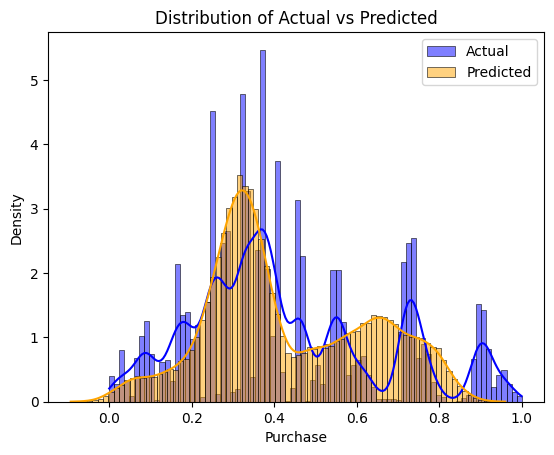

In [110]:
#Training the ML MODEL
#Using Linear Regression, Random Forest Regressor and XGBoost

#1. Linear Regression

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

linear_reg_pred = linear_reg_model.predict(X_test)
print("Linear Regression:", linear_reg_pred)

# Print predicted vs actual values for the first few data points
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': linear_reg_pred})
print(comparison.head())

#MAE, MSE AND R-SQUARE to understandd the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("MAE:", mean_absolute_error(y_test, linear_reg_pred))
print("MSE:", mean_squared_error(y_test, linear_reg_pred))
print("R-Squared:", r2_score(y_test, linear_reg_pred))

#Visualizing the values for actual and predicted
sns.histplot(y_test, color='blue', kde=True, label='Actual', stat="density")
sns.histplot(linear_reg_pred, color='orange', kde=True, label='Predicted', stat="density")
plt.title('Distribution of Actual vs Predicted')
plt.legend()
plt.show()

#Observations: Can see 0.3 -0.5 values are overlapping so nearby prediction but for 0.2 - 0.7 the predictions are deviating.
#So Linear Regession model is slightly struggling when it comes to capture non-linear relationships

In [132]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
random_forest_model.fit(X_train,y_train)

rf_pred = random_forest_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

mse = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(f"MAE: {mse:.4f}, R2: {r2_rf: .4f}")
comparison_rf = pd.DataFrame({'Actual': y_test.values, 'Predicted': rf_pred})
print(comparison_rf.head())


MAE: 0.0857, R2:  0.7469
     Actual  Predicted
0  0.446486   0.531047
1  0.710665   0.644369
2  0.282929   0.359658
3  0.324262   0.315770
4  0.463553   0.402905


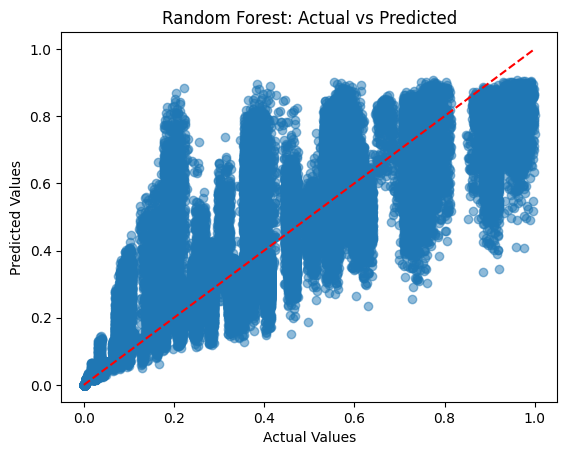

In [124]:
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


In [133]:
#XGBoost Performance
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

xg_model = XGBRegressor(n_estimators = 100, max_depth = 10, random_state = 42)

xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)

mse = mean_absolute_error(y_test,xg_pred)
xgb_r = r2_score(y_test, xg_pred)

print(f"XGBoost MAE: {mse:.4f}, R2: {xgb_r:.4f}")

comparison_xg = pd.DataFrame({'Actual': y_test.values, 'Predicted': xg_pred})
print(comparison_xg.head())


XGBoost MAE: 0.0840, R2: 0.7525
     Actual  Predicted
0  0.446486   0.468224
1  0.710665   0.664652
2  0.282929   0.361723
3  0.324262   0.322310
4  0.463553   0.420687


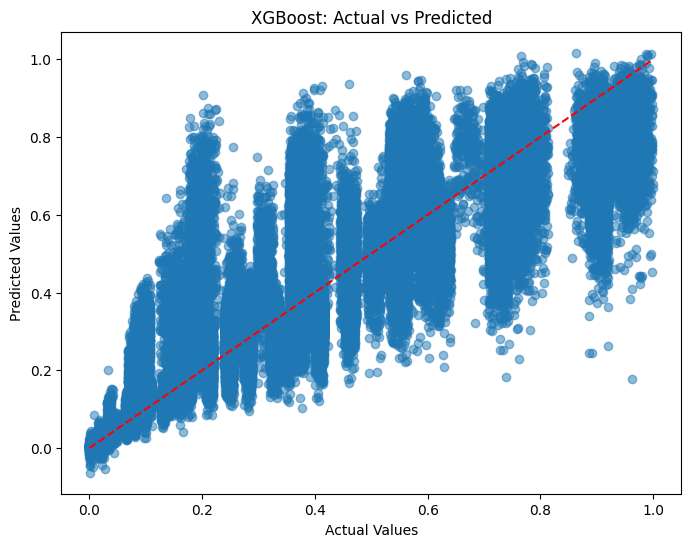

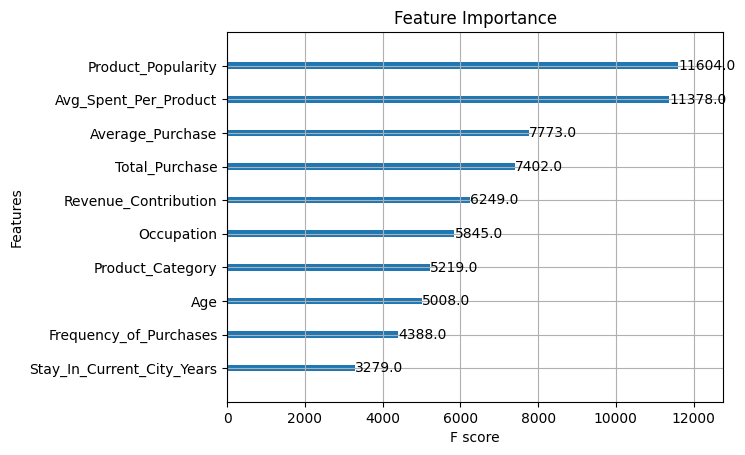

In [131]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

from xgboost import plot_importance

plot_importance(xg_model, max_num_features=10)
plt.title('Feature Importance')
plt.show()